## How to: Calibrate the age-action model using an external sample of stars and their ages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import jax.numpy as jnp

import zoomies

%load_ext autoreload
%autoreload 2

# Fake Data

In [2]:
age = np.genfromtxt('/Users/ssagear/Downloads/age.txt')
lnJz = np.genfromtxt('/Users/ssagear/Downloads/lnJz.txt')
age_err = np.array([0.75] * len(age))

Plot the calibration sample in age--action space:

(0.0, 14.0)

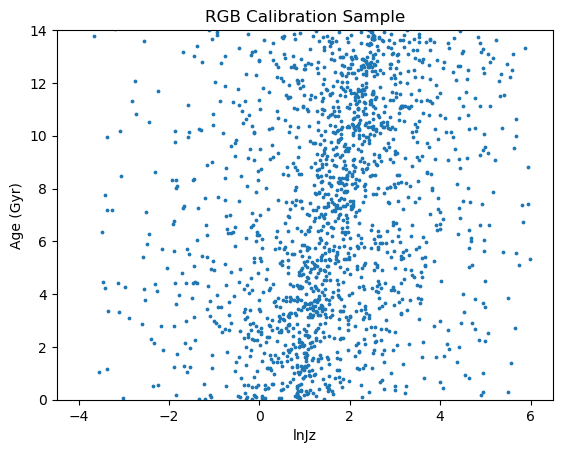

In [3]:
# Calibration sample in age-lnJz space
plt.scatter(lnJz, age, s=3)
plt.xlabel('lnJz')
plt.ylabel('Age (Gyr)')
plt.title('RGB Calibration Sample')

plt.ylim(0,14)

### Calibrating the monotonic age-lnJz spline model

First, define a KinematicAgeSpline object using ``jax`` arrays of the age, age_error, and lnJz variables we defined above:

In [4]:
spline = zoomies.KinematicAgeSpline(jnp.array(lnJz), jnp.array(age), jnp.array(age_err))

With ``spline.fit_mono_spline``, you can fit the age--action model (including a monotonic age--lnJz spline) using the calibration sample in one step. 

In [5]:
spline.fit_mono_spline(num_warmup=2000, num_samples=2000)

Fitting line...


  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

Let's plot our spline model against the calibration data:

In [ ]:
spline.evaluate_spline()

Text(0.5, 1.0, 'Age vs. $ln(J_z)$')

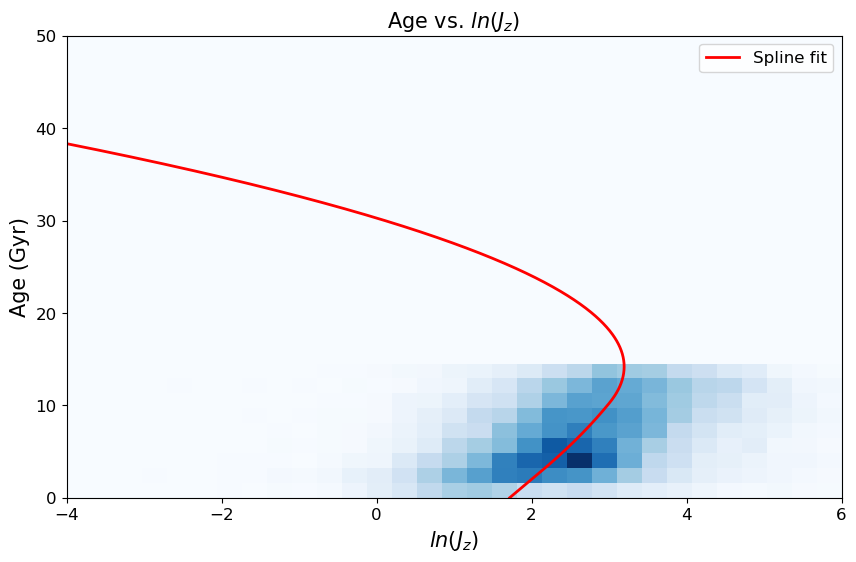

In [ ]:
plt.hist2d(spline.lnJz, spline.age, bins=(np.linspace(-4, 6, 32), np.linspace(0, 50, 32)), cmap='Blues')
plt.plot(spline.eval_spline, spline.grid, color='red', label='Spline fit', lw=2)

plt.ylabel('Age (Gyr)', fontsize=15);
plt.xlabel('$ln(J_z)$', fontsize=15);
#plt.colorbar(label='# density');
plt.legend()
plt.title('Age vs. $ln(J_z)$', fontsize=15)

We can take a look at the sample statistics using ``spline.inf_data``:

In [ ]:
import arviz as az
az.summary(spline.inf_data)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
V,1.314,0.013,1.291,1.339,0.000,0.000,3207.0,2825.0,1.0
age_knot_vals[0],1.533,0.047,1.442,1.617,0.001,0.001,1247.0,1524.0,1.0
age_knot_vals[1],0.157,0.011,0.136,0.178,0.000,0.000,1130.0,1353.0,1.0
age_knot_vals[2],0.111,0.011,0.090,0.131,0.000,0.000,1324.0,1734.0,1.0
age_knot_vals[3],0.093,0.010,0.075,0.114,0.000,0.000,2028.0,2018.0,1.0
age_knot_vals[4],0.010,0.009,0.000,0.026,0.000,0.000,2433.0,1465.0,1.0
dens_knot_vals[0],4.273,0.115,4.054,4.488,0.002,0.002,2700.0,2691.0,1.0
dens_knot_vals[1],7.519,0.015,7.491,7.546,0.000,0.000,4604.0,2970.0,1.0
dens_knot_vals[2],7.421,0.014,7.395,7.447,0.000,0.000,4163.0,2637.0,1.0
dens_knot_vals[3],7.290,0.015,7.260,7.317,0.000,0.000,5400.0,2957.0,1.0


Using the ``KinematicAgeSpline.evaluate_ages()`` function, you can generate a predicted age probability distribution for any value of ln($J_z$).

``evaluate_ages()`` returns two things:

``eval_grid`` is the test age array upon which the age probabilities are evaluated.

``eval_pdf`` is the kinematic age probability at each point in ``eval_grid``.

Plotting ``eval_pdf`` vs. ``eval_grid`` gives you the kinematic age probability density function.

In [ ]:
# evaluate_ages() takes an argument of ln(Jz).

eval_grid, eval_pdf_m3 = spline.evaluate_ages(-3)
_, eval_pdf_m1 = spline.evaluate_ages(-1)
_, eval_pdf_0 = spline.evaluate_ages(0)
_, eval_pdf_1 = spline.evaluate_ages(1)
_, eval_pdf_2 = spline.evaluate_ages(2)
_, eval_pdf_3 = spline.evaluate_ages(3)
_, eval_pdf_4 = spline.evaluate_ages(4)
_, eval_pdf_5 = spline.evaluate_ages(5)

Text(0.5, 1.0, 'Age Predictions for Test $ln(J_z) Values$')

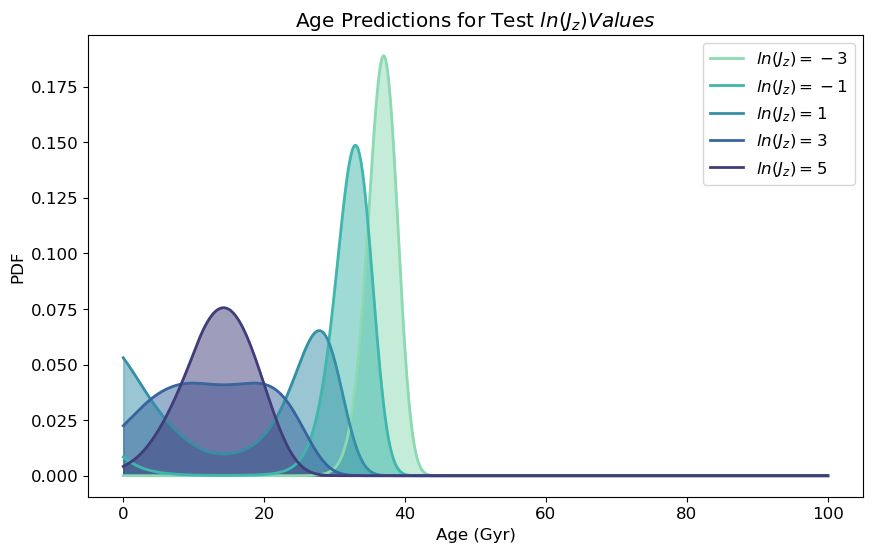

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12

plt.plot(eval_grid, eval_pdf_m3, label='$ln(J_z)=-3$', color=sns.color_palette("mako_r").as_hex()[0], linewidth=2)
plt.plot(eval_grid, eval_pdf_m1, label='$ln(J_z)=-1$', color=sns.color_palette("mako_r").as_hex()[1], linewidth=2)
plt.plot(eval_grid, eval_pdf_1, label='$ln(J_z) = 1 $', color=sns.color_palette("mako_r").as_hex()[2], linewidth=2)
plt.plot(eval_grid, eval_pdf_3, label='$ln(J_z) = 3 $', color=sns.color_palette("mako_r").as_hex()[3], linewidth=2)
plt.plot(eval_grid, eval_pdf_5, label='$ln(J_z) = 5 $', color=sns.color_palette("mako_r").as_hex()[4], linewidth=2)

plt.fill_between(eval_grid, eval_pdf_m3, 0, color=sns.color_palette("mako_r").as_hex()[0], alpha=.5)
plt.fill_between(eval_grid, eval_pdf_m1, 0, color=sns.color_palette("mako_r").as_hex()[1], alpha=.5)
plt.fill_between(eval_grid, eval_pdf_1, 0, color=sns.color_palette("mako_r").as_hex()[2], alpha=.5)
plt.fill_between(eval_grid, eval_pdf_3, 0, color=sns.color_palette("mako_r").as_hex()[3], alpha=.5)
plt.fill_between(eval_grid, eval_pdf_5, 0, color=sns.color_palette("mako_r").as_hex()[4], alpha=.5)

plt.legend()

plt.xlabel('Age (Gyr)')
plt.ylabel('PDF')

plt.title('Age Predictions for Test $ln(J_z) Values$')

Text(0.5, 1.0, 'Age Predictions for Test $ln(J_z) Values$')

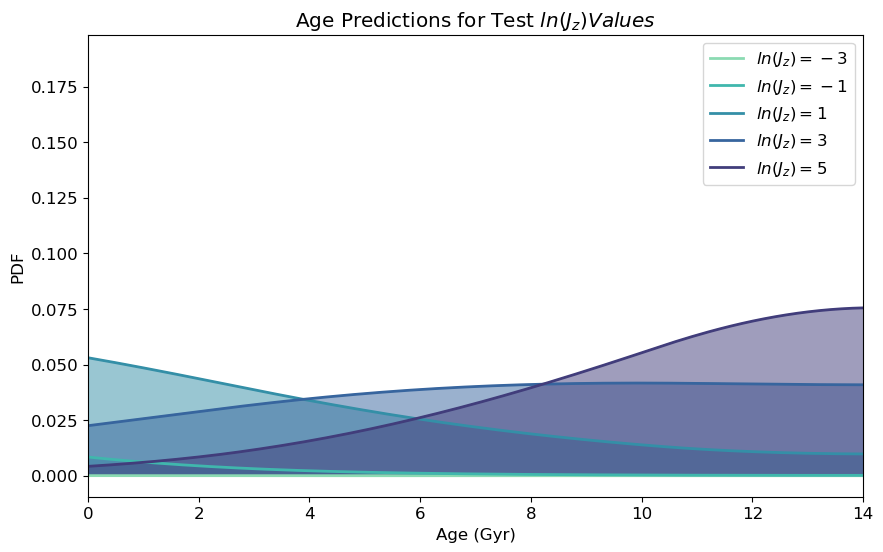

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12

plt.plot(eval_grid, eval_pdf_m3, label='$ln(J_z)=-3$', color=sns.color_palette("mako_r").as_hex()[0], linewidth=2)
plt.plot(eval_grid, eval_pdf_m1, label='$ln(J_z)=-1$', color=sns.color_palette("mako_r").as_hex()[1], linewidth=2)
plt.plot(eval_grid, eval_pdf_1, label='$ln(J_z) = 1 $', color=sns.color_palette("mako_r").as_hex()[2], linewidth=2)
plt.plot(eval_grid, eval_pdf_3, label='$ln(J_z) = 3 $', color=sns.color_palette("mako_r").as_hex()[3], linewidth=2)
plt.plot(eval_grid, eval_pdf_5, label='$ln(J_z) = 5 $', color=sns.color_palette("mako_r").as_hex()[4], linewidth=2)

plt.fill_between(eval_grid, eval_pdf_m3, 0, color=sns.color_palette("mako_r").as_hex()[0], alpha=.5)
plt.fill_between(eval_grid, eval_pdf_m1, 0, color=sns.color_palette("mako_r").as_hex()[1], alpha=.5)
plt.fill_between(eval_grid, eval_pdf_1, 0, color=sns.color_palette("mako_r").as_hex()[2], alpha=.5)
plt.fill_between(eval_grid, eval_pdf_3, 0, color=sns.color_palette("mako_r").as_hex()[3], alpha=.5)
plt.fill_between(eval_grid, eval_pdf_5, 0, color=sns.color_palette("mako_r").as_hex()[4], alpha=.5)

plt.legend()

plt.xlabel('Age (Gyr)')
plt.ylabel('PDF')

plt.xlim(0,14)

plt.title('Age Predictions for Test $ln(J_z) Values$')